# Module 2 Project: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.offline as pyo
from string import ascii_letters
from statsmodels.formula.api import ols
import pickle
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
with open('new_df.pkl', 'rb') as pickle_file:
    new_df = pickle.load(pickle_file)

In [3]:
with open('stan_df.pkl', 'rb') as pickle_file:
    stan_df = pickle.load(pickle_file)

In [4]:
new_df.head()

,bathrooms,bedrooms,condition,floors,grade,price,sqft_above,sqft_basement,sqft_living,sqft_lot,view,yr_built,yr_renovated,pop_bin,sqft_non_living,box_cox_condition,sqrt_sqft_basement,living_fraction,sqrt_living_fraction
0,2.25,3.0,3.0,2.0,7.0,257500.0,1715.0,0.0,1715.0,6819.0,0.0,1995.0,0.0,4.0,5104.0,0.936034,0.000000,0.251503,0.501501
1,1.00,2.0,4.0,1.0,7.0,189000.0,1200.0,0.0,1200.0,9850.0,0.0,1921.0,0.0,5.0,8650.0,1.134321,0.000000,0.121827,0.349038
2,2.75,5.0,3.0,2.0,9.0,861990.0,3595.0,0.0,3595.0,5639.0,0.0,2014.0,0.0,1.0,2044.0,0.936034,0.000000,0.637524,0.798451
3,2.50,4.0,3.0,2.0,10.0,720000.0,3450.0,0.0,3450.0,39683.0,0.0,2002.0,0.0,1.0,36233.0,0.936034,0.000000,0.086939,0.294854
4,1.75,3.0,4.0,1.0,7.0,272500.0,1160.0,380.0,1540.0,12600.0,0.0,1980.0,0.0,1.0,11060.0,1.134321,19.493589,0.122222,0.349603


In [5]:
stan_df.head()

,bathrooms,bedrooms,condition,floors,grade,price,sqft_above,sqft_basement,sqft_living,sqft_lot,view,yr_built,yr_renovated,pop_bin,sqft_non_living,box_cox_condition,sqrt_sqft_basement,living_fraction,sqrt_living_fraction
0,0.174461,-0.411272,-0.629946,0.937385,-0.560817,-0.769779,-0.088954,-0.658992,-0.397934,-0.199959,-0.304956,0.817001,-0.188886,-0.243266,-0.191829,-0.599658,-0.755441,-0.269146,-0.133176
1,-1.451069,-1.517353,0.907438,-0.915591,-0.560817,-0.956241,-0.711127,-0.658992,-0.958874,-0.126769,-0.304956,-1.702167,-0.188886,0.104560,-0.105893,0.980510,-0.755441,-0.752182,-0.863405
2,0.824672,1.800890,-0.629946,0.937385,1.143935,0.875685,2.182279,-0.658992,1.649772,-0.228453,-0.304956,1.463814,-0.188886,-1.286744,-0.265987,-0.599658,-0.755441,1.168765,1.289080
3,0.499567,0.694809,-0.629946,0.937385,1.996311,0.489178,2.007104,-0.658992,1.491837,0.593616,-0.304956,1.055300,-0.188886,-1.286744,0.562571,-0.599658,-0.755441,-0.882140,-1.122920
4,-0.475751,-0.411272,0.907438,-0.915591,-0.560817,-0.728948,-0.759452,0.199448,-0.588545,-0.060364,-0.304956,0.306358,-0.188886,-1.286744,-0.047487,0.980510,0.674968,-0.750711,-0.860698


### Distribution of variables can be inspected.

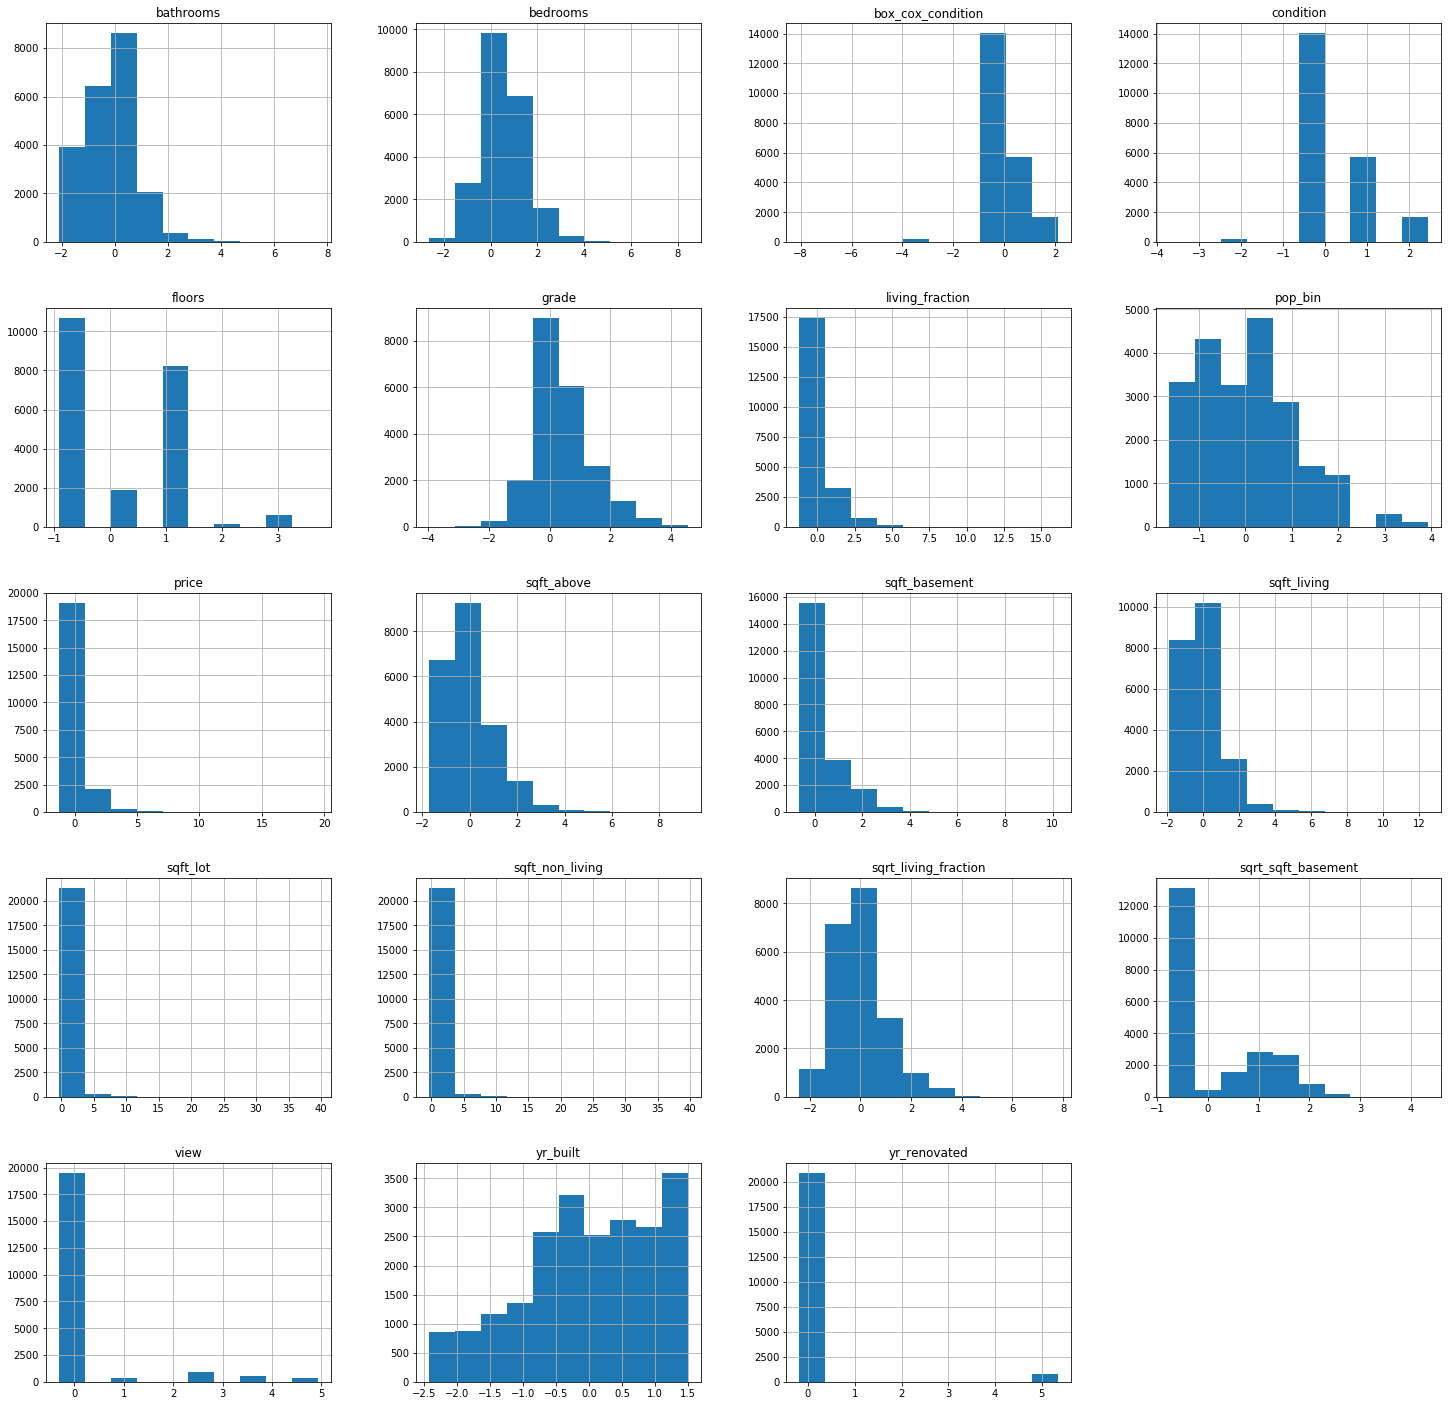

In [6]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (25,25))
ax = fig.gca()
stan_df.hist(ax = ax);

### The relationships between input variables and property price can be analysed.

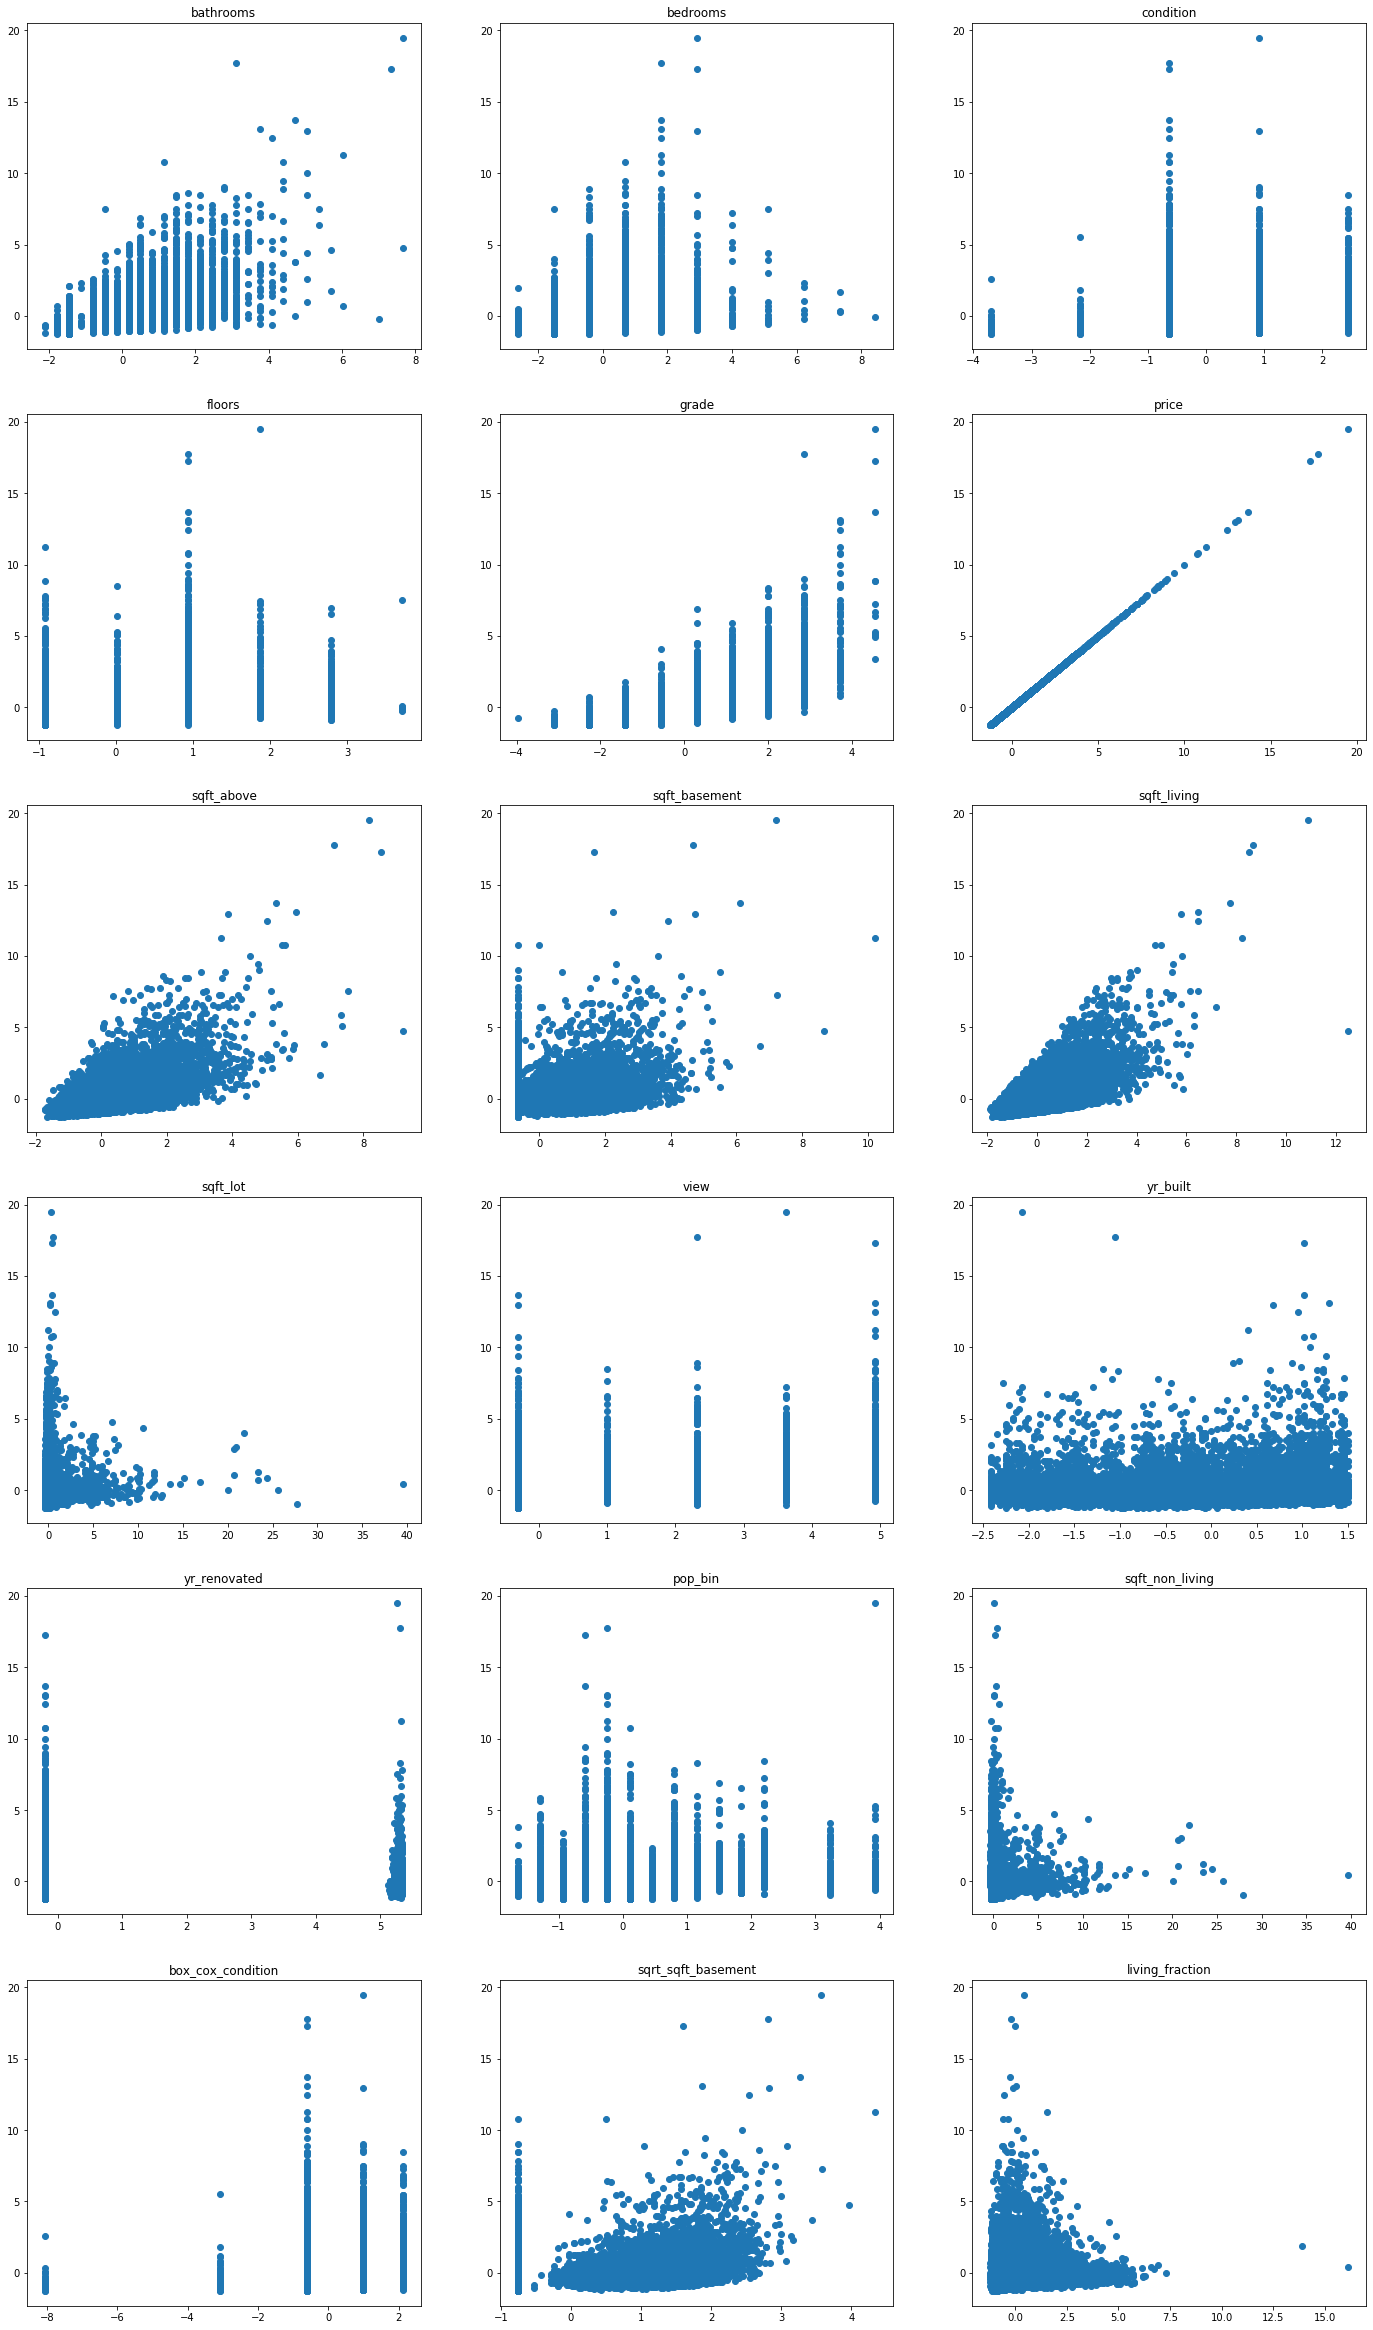

In [7]:
fig, axs = plt.subplots(6,3)
fig.set_figwidth(24)
fig.set_figheight(42)
for ax, col in zip(axs.flat, stan_df.columns):
    try:
        ax.scatter(x=col, y='price', data=stan_df)
        ax.set_title(col)
    except:
        ax.set_title(col)
        continue

In [8]:
#breusch-pagan or cook-weisberg

# VIF testing will test for multicolinearity. 

VIF of greater than 5 indicates multicolinearity.

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
stan_df.columns

Index(['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'price',
       'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_lot', 'view',
       'yr_built', 'yr_renovated', 'pop_bin', 'sqft_non_living',
       'box_cox_condition', 'sqrt_sqft_basement', 'living_fraction',
       'sqrt_living_fraction'],
      dtype='object')

In [11]:
outcome = 'price'
x_cols = ['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'price',
       'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_lot', 'view',
       'yr_built', 'yr_renovated', 'pop_bin', 'sqft_non_living',
       'box_cox_condition', 'sqrt_sqft_basement', 'living_fraction',
       'sqrt_living_fraction']

In [12]:
X = stan_df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bathrooms', 3.490983259844102),
 ('bedrooms', 1.742266098812344),
 ('condition', 25.231148801506478),
 ('floors', 2.9167183149873765),
 ('grade', 3.5163302488091333),
 ('price', 2.926701584257691),
 ('sqft_above', inf),
 ('sqft_basement', inf),
 ('sqft_living', inf),
 ('sqft_lot', inf),
 ('view', 1.245365959192836),
 ('yr_built', 2.867641045823202),
 ('yr_renovated', 1.1210597955204604),
 ('pop_bin', 2.126782029363906),
 ('sqft_non_living', inf),
 ('box_cox_condition', 24.43685610982357),
 ('sqrt_sqft_basement', 15.99369740256191),
 ('living_fraction', 20.53300206246598),
 ('sqrt_living_fraction', 22.76817040131883)]

### Eliminating condition, sqft_above, sqft_living, sqft_non_living, sqft_basement, living_fraction. 

We have already accomodated for these prior to scaling by: 
 - Taking the **square root** of sqft_baasement. 
 - Taking the **square root** of living_fraction.
 - Completing a **box cox transformation** for condition. 

In [13]:
outcome = 'price'
x_cols = ['bathrooms', 'bedrooms', 'floors', 'grade', 'price',
          'sqft_lot', 'view', 'yr_built', 'yr_renovated', 'pop_bin',
          'box_cox_condition', 'sqrt_sqft_basement',
          'sqrt_living_fraction']

In [14]:
X = stan_df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bathrooms', 3.1457852196352944),
 ('bedrooms', 1.4950085963261066),
 ('floors', 2.7447982389465237),
 ('grade', 2.8956983321078167),
 ('price', 2.498934221827768),
 ('sqft_lot', 1.3062245904619607),
 ('view', 1.2336899631017155),
 ('yr_built', 2.737510072965355),
 ('yr_renovated', 1.1120057115891067),
 ('pop_bin', 1.9639611463237991),
 ('box_cox_condition', 1.1854512978476208),
 ('sqrt_sqft_basement', 1.7596469117711557),
 ('sqrt_living_fraction', 2.66548182831867)]

In [15]:
outliers_df = stan_df[x_cols]

In [16]:
outliers_df.head()

,bathrooms,bedrooms,floors,grade,price,sqft_lot,view,yr_built,yr_renovated,pop_bin,box_cox_condition,sqrt_sqft_basement,sqrt_living_fraction
0,0.174461,-0.411272,0.937385,-0.560817,-0.769779,-0.199959,-0.304956,0.817001,-0.188886,-0.243266,-0.599658,-0.755441,-0.133176
1,-1.451069,-1.517353,-0.915591,-0.560817,-0.956241,-0.126769,-0.304956,-1.702167,-0.188886,0.104560,0.980510,-0.755441,-0.863405
2,0.824672,1.800890,0.937385,1.143935,0.875685,-0.228453,-0.304956,1.463814,-0.188886,-1.286744,-0.599658,-0.755441,1.289080
3,0.499567,0.694809,0.937385,1.996311,0.489178,0.593616,-0.304956,1.055300,-0.188886,-1.286744,-0.599658,-0.755441,-1.122920
4,-0.475751,-0.411272,-0.915591,-0.560817,-0.728948,-0.060364,-0.304956,0.306358,-0.188886,-1.286744,0.980510,0.674968,-0.860698


# Outliers can be removed using  IQR score.

In [65]:
Q1 = outliers_df.quantile(0.25)
Q3 = outliers_df.quantile(0.8)
IQR = Q3 - Q1
print(IQR)

bathrooms               0.975318
bedrooms                1.106081
floors                  1.852976
grade                   0.852376
price                   1.030303
sqft_lot                0.172484
view                    0.000000
yr_built                1.702140
yr_renovated            0.000000
pop_bin                 1.391304
box_cox_condition       1.580169
sqrt_sqft_basement      1.941411
sqrt_living_fraction    1.350935
dtype: float64


       bathrooms  bedrooms  floors  grade  price  sqft_lot   view  yr_built  \
0          False     False   False  False  False     False  False     False   
1          False     False   False  False  False     False  False     False   
2          False     False   False  False  False     False  False     False   
3          False     False   False  False  False     False  False     False   
4          False     False   False  False  False     False  False     False   
...          ...       ...     ...    ...    ...       ...    ...       ...   
21591      False     False   False  False  False     False  False     False   
21592      False     False   False  False  False     False  False     False   
21593      False     False   False  False  False     False  False     False   
21594      False     False   False  False  False     False  False     False   
21595      False     False   False  False  False     False  False     False   

       yr_renovated  pop_bin  box_cox_condition  sq

,bathrooms,bedrooms,floors,grade,price,sqft_lot,view,yr_built,yr_renovated,pop_bin,box_cox_condition,sqrt_sqft_basement,sqrt_living_fraction
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,False,False,False,False,False,False,False,False,False,False,False,False,True
21592,False,False,False,False,False,False,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False,False,False,False,False,False,False


### Outliers can be removed.

In [67]:
stan_df_out = outliers_df

In [68]:
stan_df_out = outliers_df[~((outliers_df < (Q1 - 1.5 * IQR)) |(outliers_df > (Q3 + 1.5 * IQR))).any(axis=1)]
stan_df_out.shape


(15050, 13)

# Train-Test data split can be performed.

In [69]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(stan_df_out, test_size=0.3)

In [70]:
test.shape

(4515, 13)

In [71]:
train.shape

(10535, 13)

# An initial model can be fit.

In [72]:
train.head()

,bathrooms,bedrooms,floors,grade,price,sqft_lot,view,yr_built,yr_renovated,pop_bin,box_cox_condition,sqrt_sqft_basement,sqrt_living_fraction
13043,0.499567,-0.411272,-0.915591,-0.560817,-0.382021,-0.188344,-0.304956,0.102102,-0.188886,0.104560,-0.599658,0.835366,-0.356819
2392,-1.451069,-1.517353,-0.915591,-1.413193,-0.357386,-0.285634,-0.304956,-1.804296,-0.188886,1.148039,0.980510,-0.755441,-0.036812
11450,0.174461,-0.411272,-0.915591,-0.560817,-0.297500,-0.151375,-0.304956,0.272316,-0.188886,0.104560,-0.599658,0.656022,-0.354844
3232,-1.451069,-0.411272,-0.915591,-1.413193,-1.074379,-0.182066,-0.304956,-0.442583,-0.188886,-0.591092,-0.599658,-0.755441,-0.650940
5388,0.174461,0.694809,0.937385,0.291559,-0.746642,-0.193126,-0.304956,0.340401,-0.188886,0.104560,0.980510,-0.755441,0.003352


In [73]:
train.columns

Index(['bathrooms', 'bedrooms', 'floors', 'grade', 'price', 'sqft_lot', 'view',
       'yr_built', 'yr_renovated', 'pop_bin', 'box_cox_condition',
       'sqrt_sqft_basement', 'sqrt_living_fraction'],
      dtype='object')

In [74]:
outcome = 'price'
x_cols = ['bathrooms', 'bedrooms', 'floors', 'grade', 'sqft_lot', 'view',
       'yr_built', 'yr_renovated', 'pop_bin', 'box_cox_condition',
       'sqrt_sqft_basement', 'sqrt_living_fraction']

In [75]:
#WITHOUT INSIGNIFICANT P VALUES

outcome = 'price'
x_cols = ['bathrooms', 'bedrooms', 'grade', 'sqft_lot', 'view',
       'yr_built', 'yr_renovated', 'pop_bin', 'box_cox_condition',
          'sqrt_living_fraction']

In [76]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     1197.
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:56:30   Log-Likelihood:                -4378.0
No. Observations:               10535   AIC:                             8774.
Df Residuals:                   10526   BIC:                             8839.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0122      0.011     -1.097      0.273      -0.034       0.010
bathrooms                0.1044      0.007     15.370      0.000       0.091       0.118
bedrooms                 0.0280      0.005      5.739      0.000       0.018       0.038
grade                    0.4091      0.007     58.649      0.000       0.395       0.423
sqft_lot                 0.7872      0.071     11.116      0.000       0.648       0.926
view                     0.0037      0.003      1.097      0.273      -0.003       0.010
yr_built                -0.1984      0.006    -32.818      0.000      -0.210      -0.187
yr_renovated             0.0023      0.002      1.097      0.273      -0.002       0.006
pop_bin                  0.0818      0.006     14.748      0.000       0.071       0.093
box_cox_condition        0.0322      0.004      7.478      0.000       0.024       0.041
sqrt_living_fraction     0.1498      0.009     16.475      0.000       0.132       0.168
==============================================================================
Omnibus:                     1031.537   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1774.963
Skew:                           0.692   Prob(JB):                         0.00
Kurtosis:                       4.459   Cond. No.                     9.59e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.54e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Checking for normality can be completed.

Verification of the normal distribution of model residuals.



skewness > 0 : more weight in the left tail of the distribution.

skewness < 0 : more weight in the right tail of the distribution. 

In [77]:
import statsmodels.api as sm
import scipy.stats as stats

In [78]:
outcome = 'price'
x_cols = ['bathrooms', 'bedrooms', 'floors', 'grade', 'sqft_lot', 'view',
       'yr_built', 'yr_renovated', 'pop_bin', 'box_cox_condition',
       'sqrt_sqft_basement', 'sqrt_living_fraction']

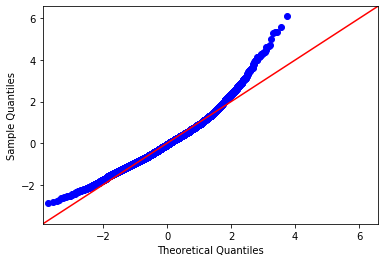

In [79]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [84]:
train.columns

Index(['bathrooms', 'bedrooms', 'floors', 'grade', 'price', 'sqft_lot', 'view',
       'yr_built', 'yr_renovated', 'pop_bin', 'box_cox_condition',
       'sqrt_sqft_basement', 'sqrt_living_fraction'],
      dtype='object')

In [85]:
train.isna().sum()

bathrooms               0
bedrooms                0
floors                  0
grade                   0
price                   0
sqft_lot                0
view                    0
yr_built                0
yr_renovated            0
pop_bin                 0
box_cox_condition       0
sqrt_sqft_basement      0
sqrt_living_fraction    0
dtype: int64

In [86]:
train.bedrooms.skew()

0.24407624603591352

In [87]:
train.bathrooms.skew()

-0.07340496595261684

In [88]:
train.floors.skew()

0.7253183855441988

In [89]:
train.grade.skew()

0.337817742873914

In [82]:
outcome = 'price'
x_cols = ['bathrooms', 'bedrooms', 'floors', 'grade', 'sqft_lot',
       'yr_built', 'pop_bin']

In [90]:
train.sqft_lot.skew()

1.0659653428313507

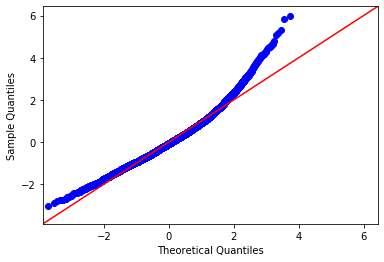

In [83]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [98]:
train.view.skew()

0

In [99]:
train.yr_built.skew()

-0.4311664116538362

In [100]:
train.yr_renovated.skew()

0

In [101]:
train.pop_bin.skew()

0.3860433497160808

In [102]:
train.sqrt_living_fraction.skew()

0.996368266495204

In [103]:
train.sqrt_sqft_basement.skew()

0.8897837296484334

In [104]:
train.box_cox_condition.skew()

0.9436502835880263

### Altering the square foot basement feature into its square root reduces the skew.

In [ ]:
#moved to cleaning doc: 
#train['sqrt_sqft_basement'] = np.sqrt(train['sqft_basement'])
#train.sqrt_sqft_basement.skew()

In [ ]:
outcome = 'price'
x_cols = ['bathrooms', 'bedrooms', 'floors', 'grade', 'sqrt_sqft_basement',
       'sqft_lot', 'view', 'yr_built', 'yr_renovated', 'pop_bin',
       'box_cox_condition', 'living_fraction']

In [ ]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Altering the living_fraction feature into its square root reduces the skew.

In [ ]:
#moved to cleaning page
#train['sqrt_living_fraction'] = np.sqrt(train['living_fraction'])
#train.sqrt_living_fraction.skew()

In [ ]:
outcome = 'price'
x_cols = ['bathrooms', 'bedrooms', 'floors', 'grade', 'sqrt_sqft_basement',
       'sqft_lot', 'view', 'yr_built', 'yr_renovated', 'pop_bin',
       'box_cox_condition', 'sqrt_living_fraction']

In [ ]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [ ]:
df_for_hetero = train[['bathrooms', 'bedrooms', 'floors', 'grade', 'sqrt_sqft_basement',
       'sqft_lot', 'view', 'yr_built', 'yr_renovated', 'pop_bin',
       'box_cox_condition', 'sqrt_living_fraction']]

In [ ]:
train.isna().sum()

In [ ]:
df_for_hetero.head()